# 1. Data Understanding and Exploration

## Project Overview
The goal of this project is to analyze the Wine Quality dataset, which contains physicochemical attributes of red and white variants of Portuguese "Vinho Verde" wine. The target variable `quality` represents the wine’s sensory quality score rated between 0 and 10.

### Dataset Source
The dataset was obtained from the UCI Machine Learning Repository:
[https://archive.ics.uci.edu/dataset/186/wine+quality](https://archive.ics.uci.edu/dataset/186/wine+quality)

### Author
Group 32?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# plotting defaults
%matplotlib inline
plt.style.use('default')
np.random.seed(42)
sns.set(style="whitegrid", palette="deep", font_scale=1.1)

### Load Data

In [3]:
red = pd.read_csv('winequality-red.csv', sep=';')
white = pd.read_csv('winequality-white.csv', sep=';')

red['color'] = 'red'
white['color'] = 'white'
df = pd.concat([red, white], ignore_index=True)

df.head()
df.shape

(6497, 13)

Note number of rows and columns, confirm the dataset meets the >1000 instances & >=10 features requirement.

### Quick statistics

In [4]:
print("\n--- Dataset Info ---")
print(df.info())

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Summary Statistics ---")
display(df.describe())



--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  color                 6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB
None

--- Missing Values ---
fixed acidit

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


### Distribution of Target Variable (Quality)

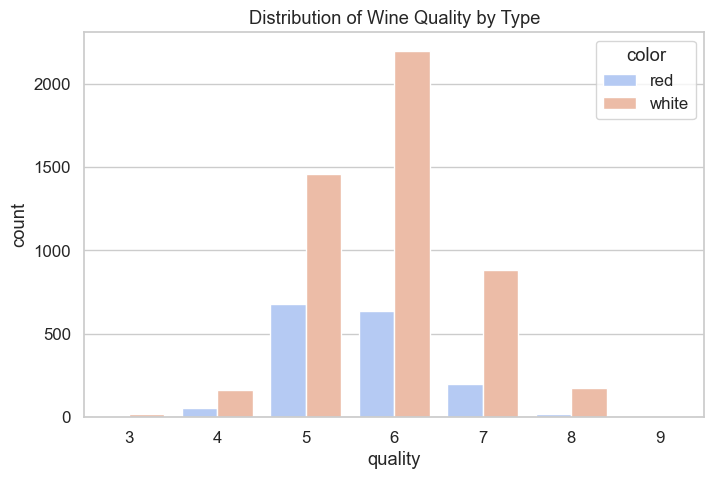

In [5]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', hue='color', data=df, palette='coolwarm')
plt.title('Distribution of Wine Quality by Type')
plt.show()


### Univariate Analysis

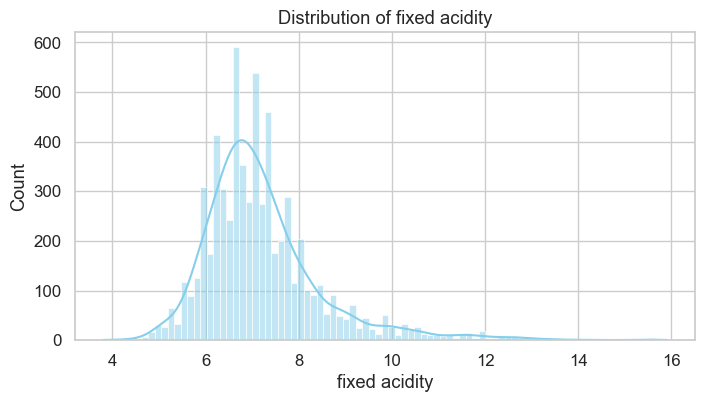

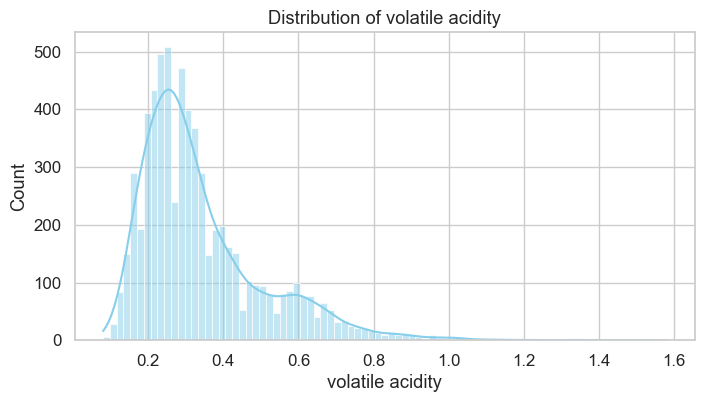

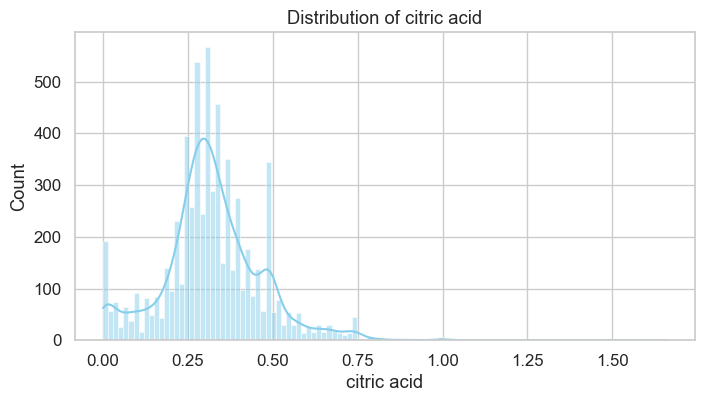

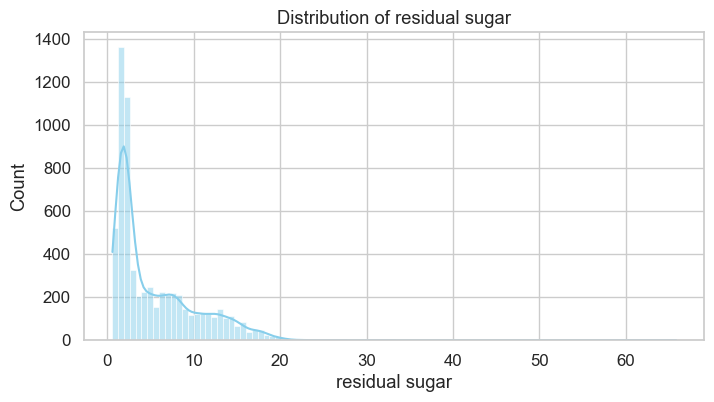

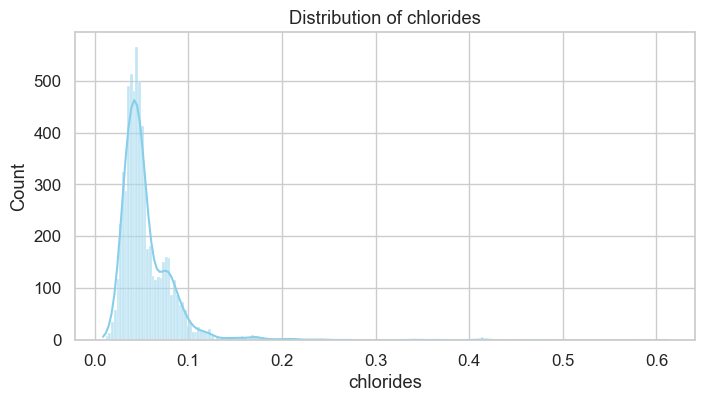

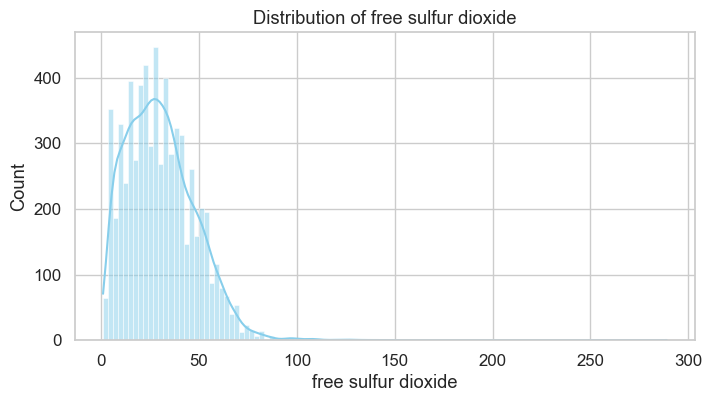

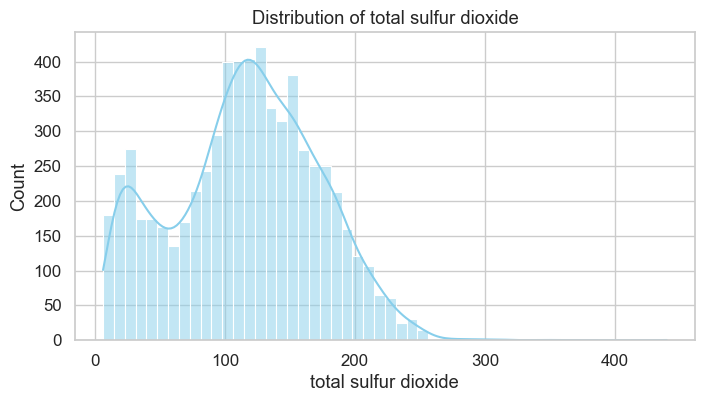

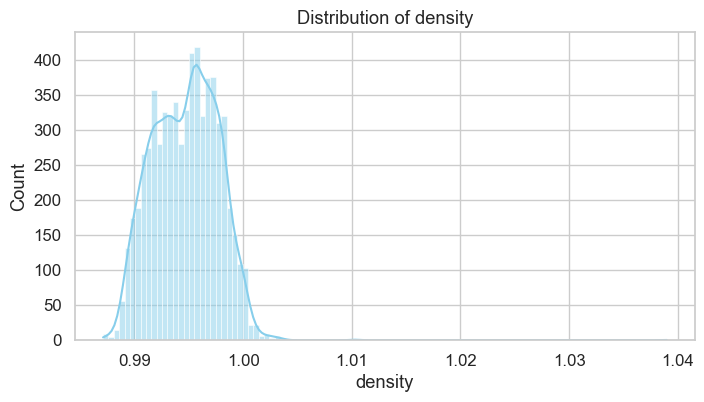

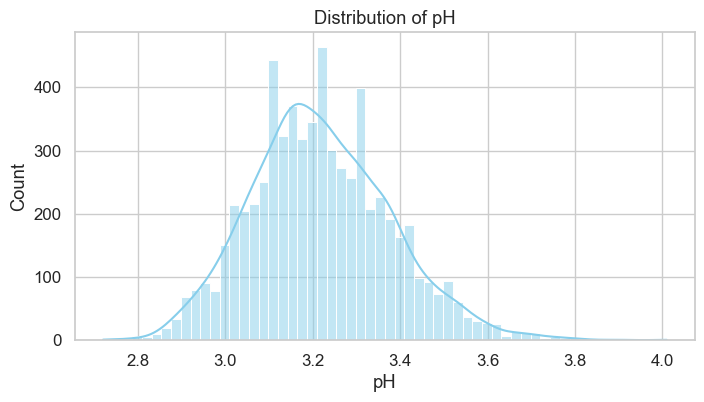

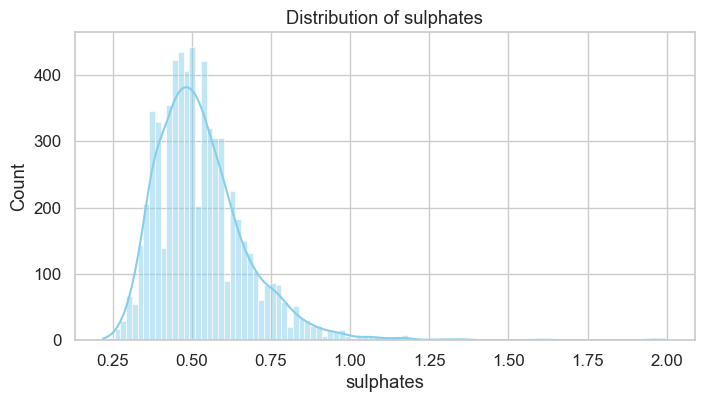

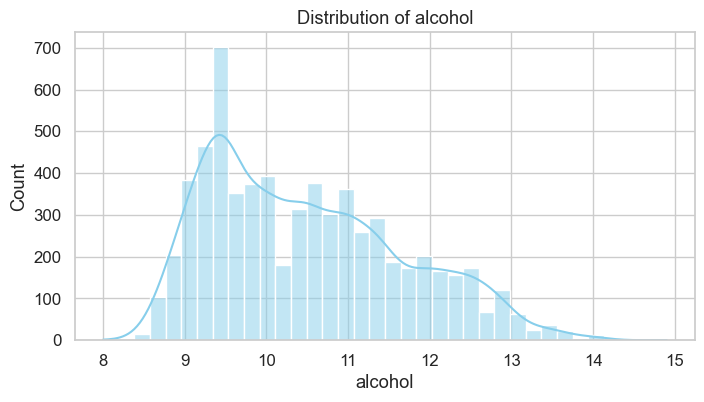

In [6]:
num_features = df.select_dtypes(include=['float64', 'int64']).columns.drop('quality')

for col in num_features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=df, x=col, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


#### Boxplots to visualize outliers

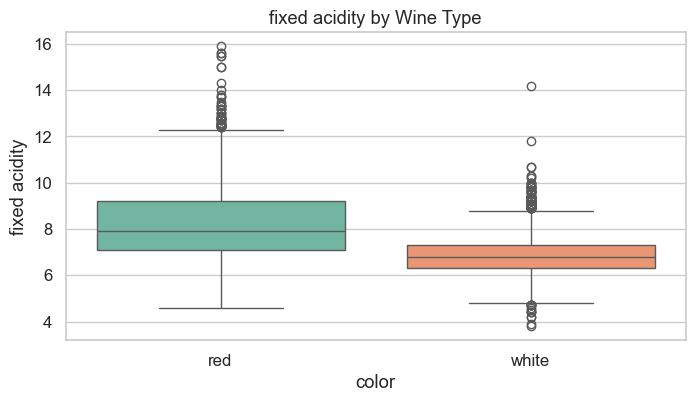

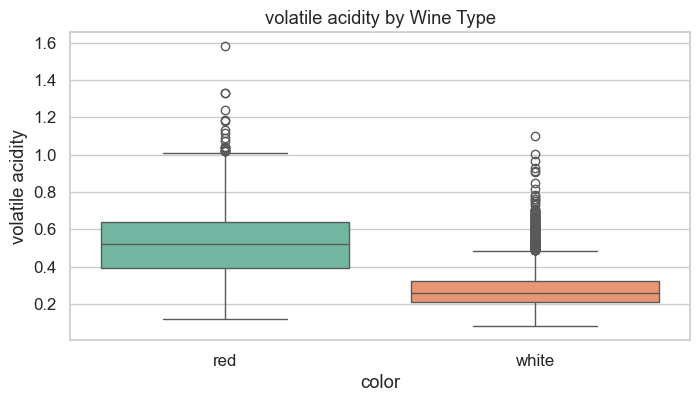

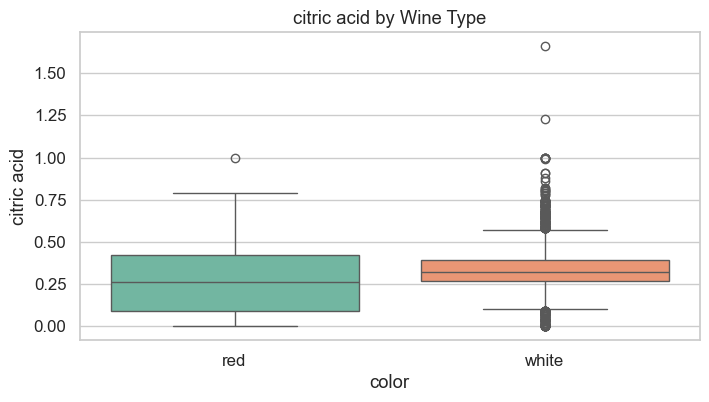

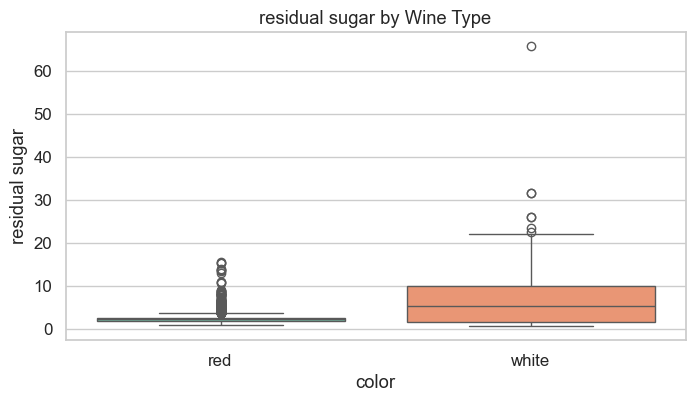

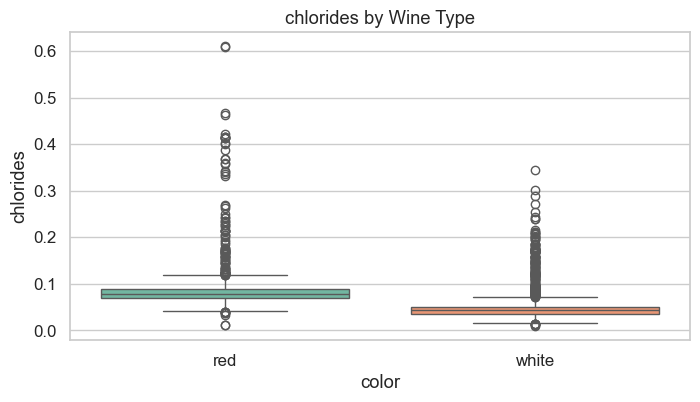

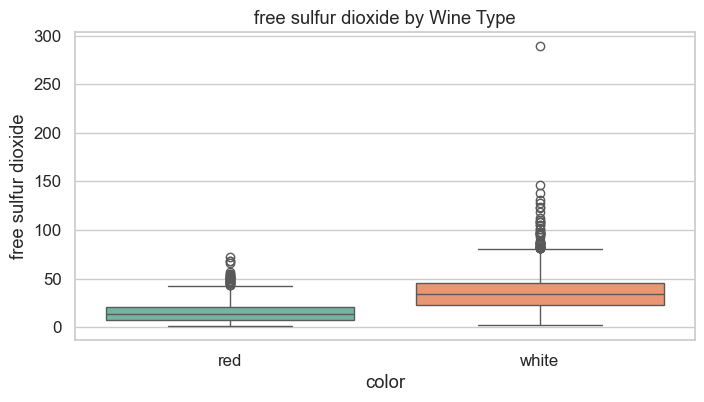

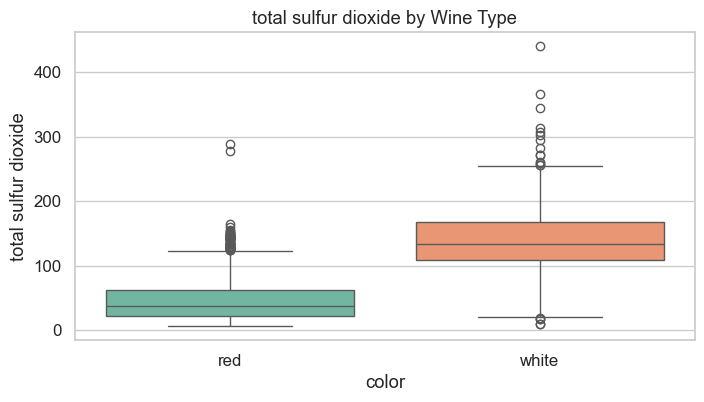

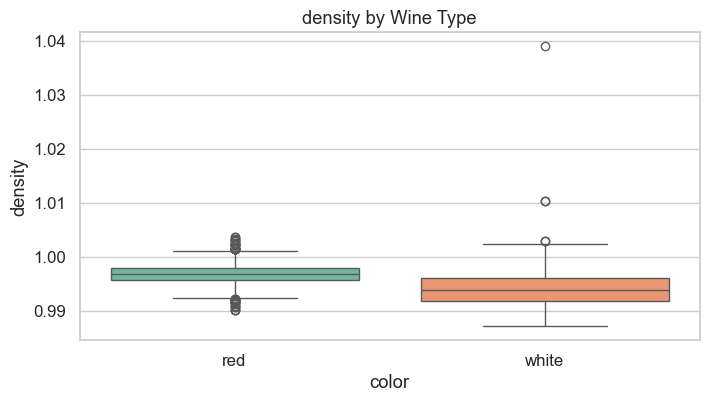

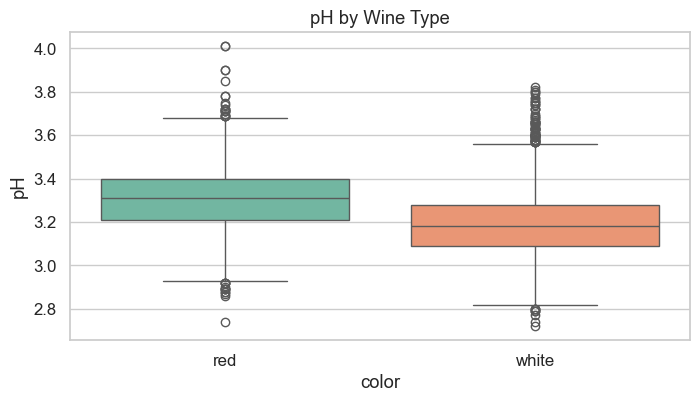

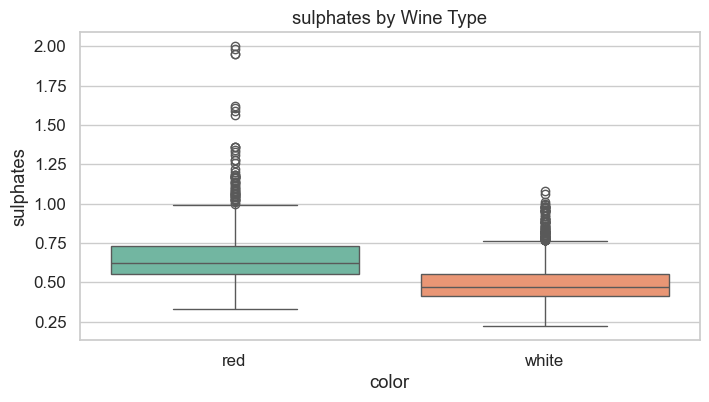

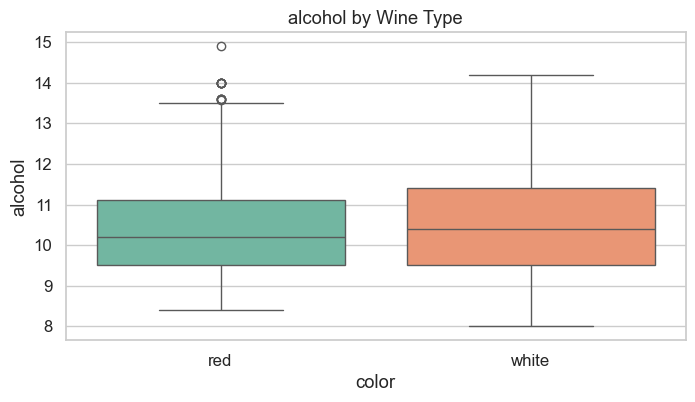

In [16]:
for col in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='color', y=col,hue='color', data=df, palette='Set2', legend=False)
    plt.title(f'{col} by Wine Type')
    plt.show()


### Correlation Heatmap

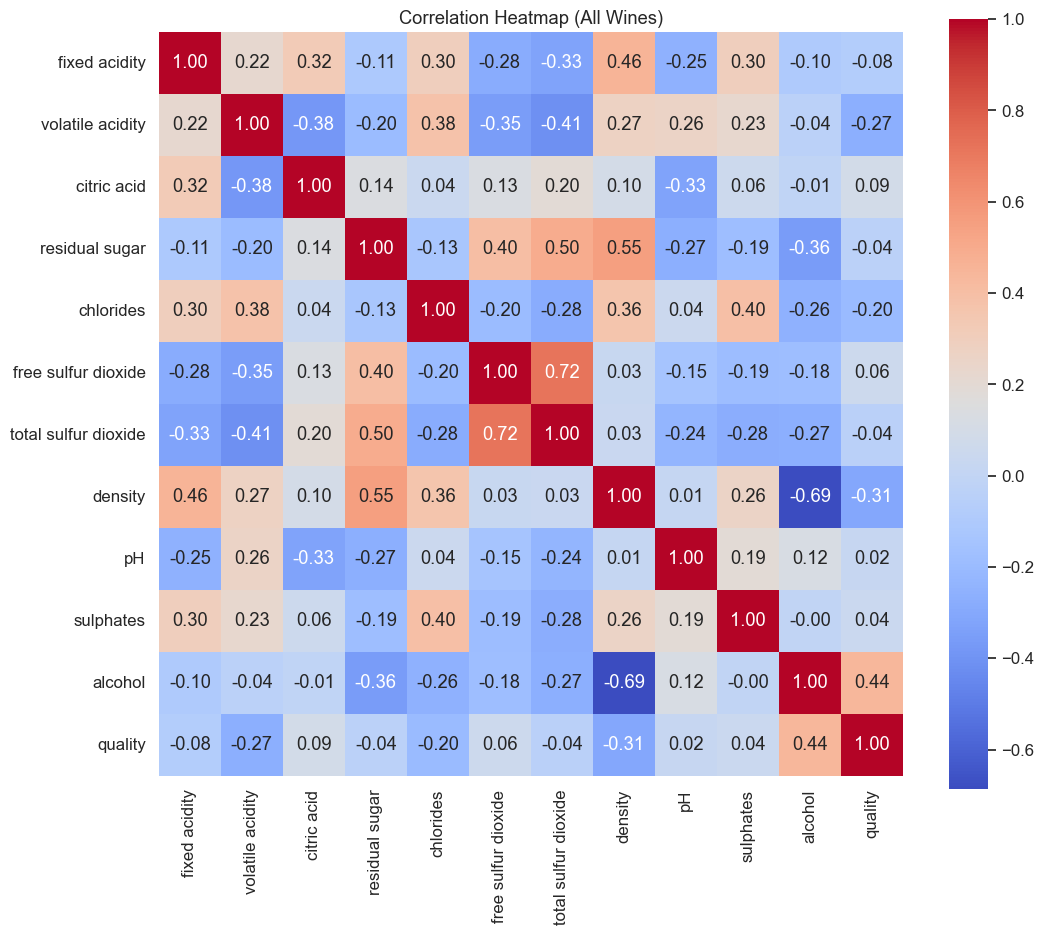

In [8]:
plt.figure(figsize=(12,10))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title("Correlation Heatmap (All Wines)")
plt.show()

### Relationship Between Features and Quality

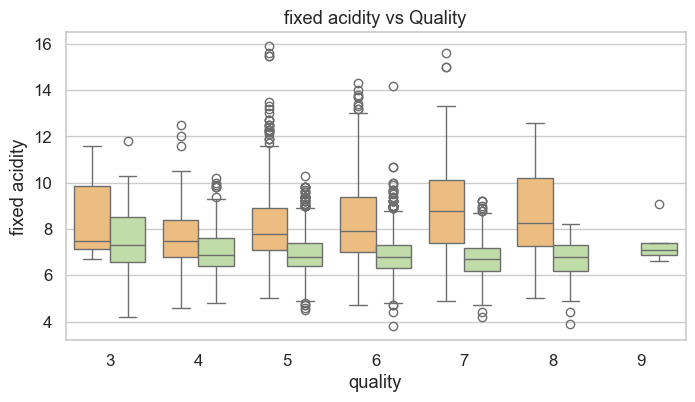

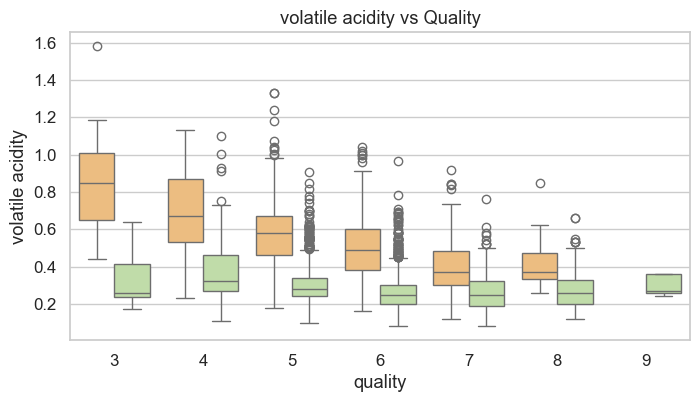

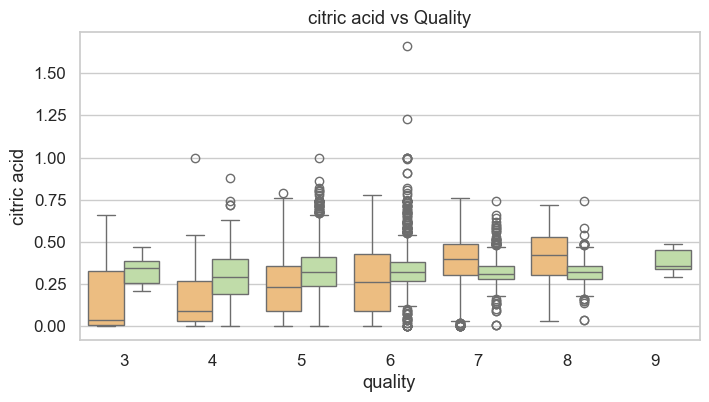

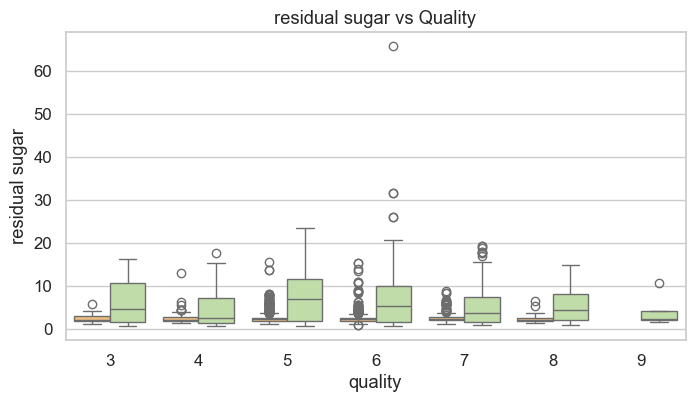

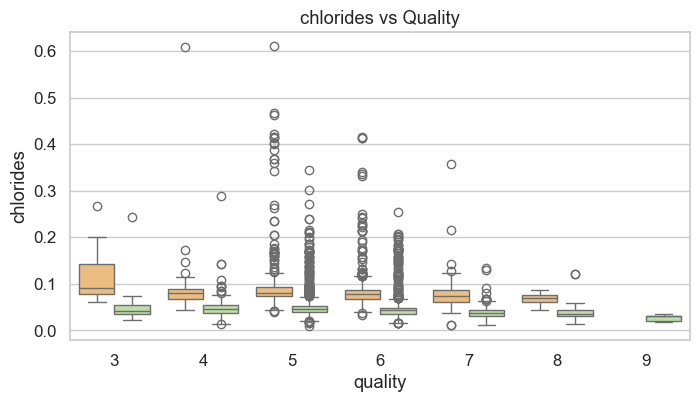

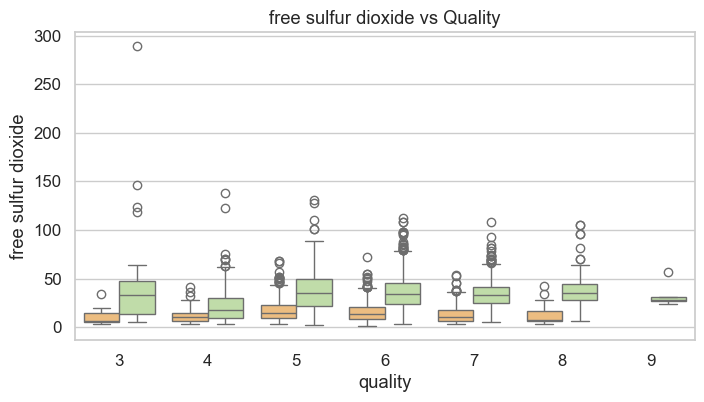

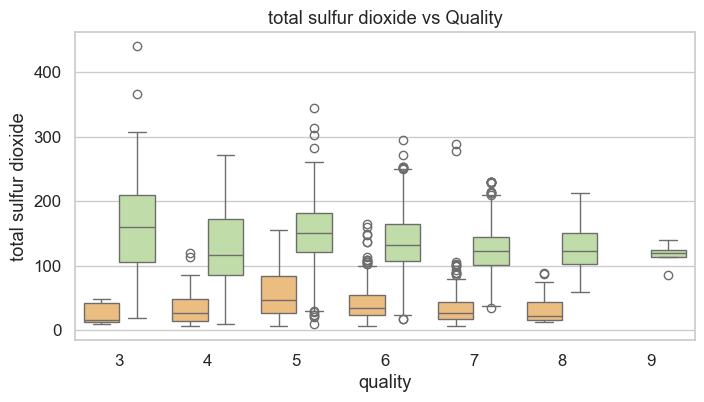

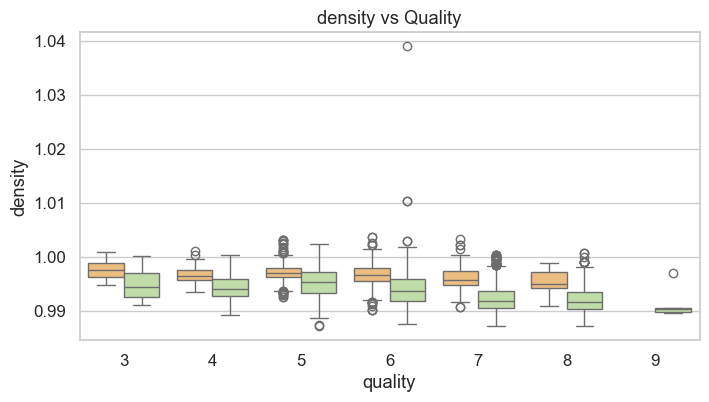

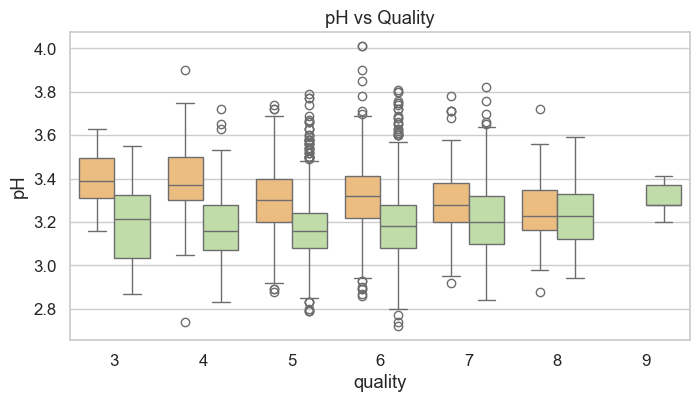

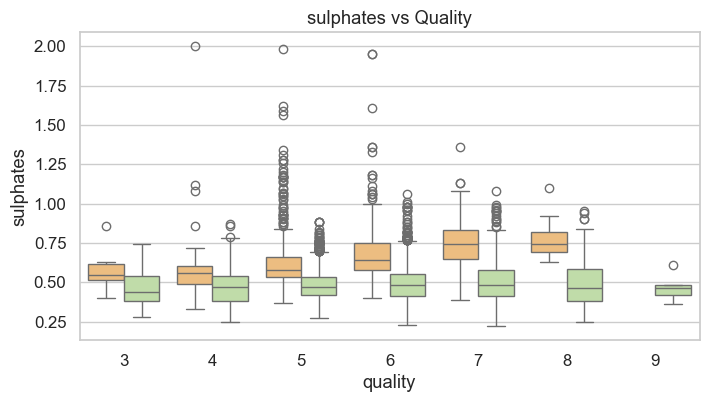

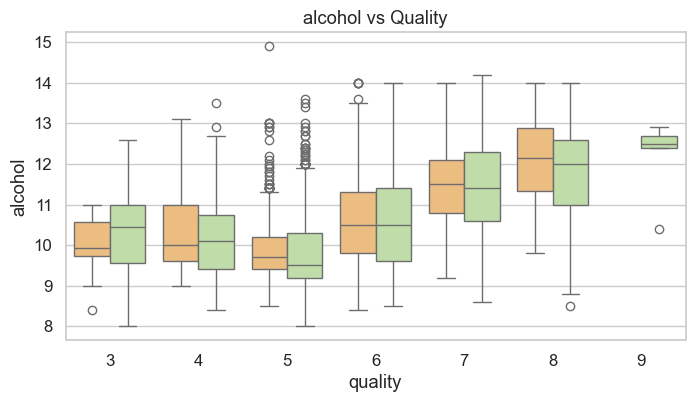

In [17]:
for col in num_features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='quality', y=col,hue='color', data=df, palette='Spectral', legend=False)
    plt.title(f'{col} vs Quality')
    plt.show()

### Key Correlations with Quality

In [10]:
corr_with_quality = corr['quality'].sort_values(ascending=False)
print("\n--- Correlation of Features with Quality ---")
print(corr_with_quality)


--- Correlation of Features with Quality ---
quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64


### Bivariate Relationships (Scatter Plots)

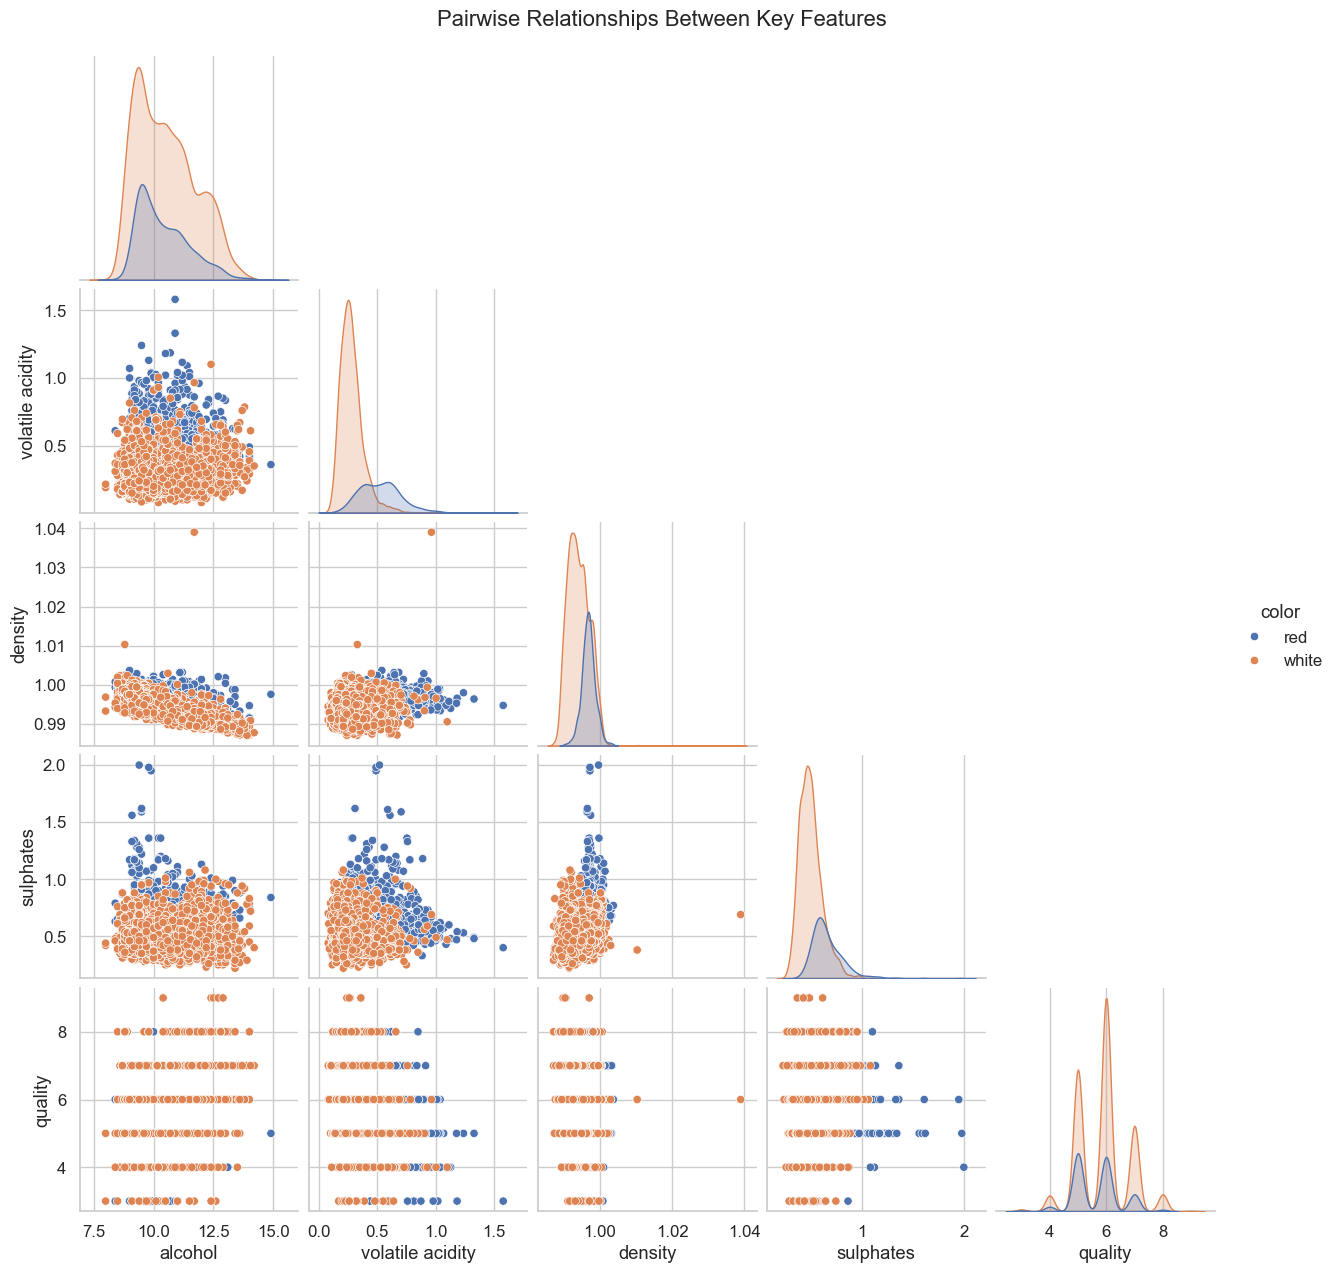

In [11]:
sns.pairplot(df[['alcohol', 'volatile acidity', 'density', 'sulphates', 'quality', 'color']], 
             hue='color', diag_kind='kde', corner=True)
plt.suptitle('Pairwise Relationships Between Key Features', y=1.02)
plt.show()

### Comparing Red vs White Wines

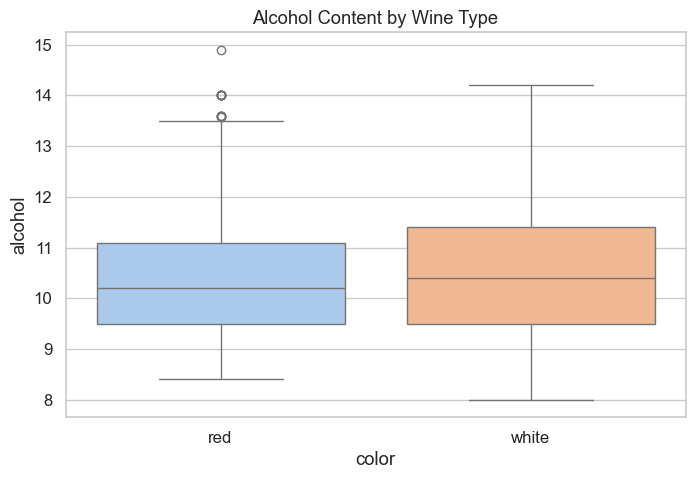

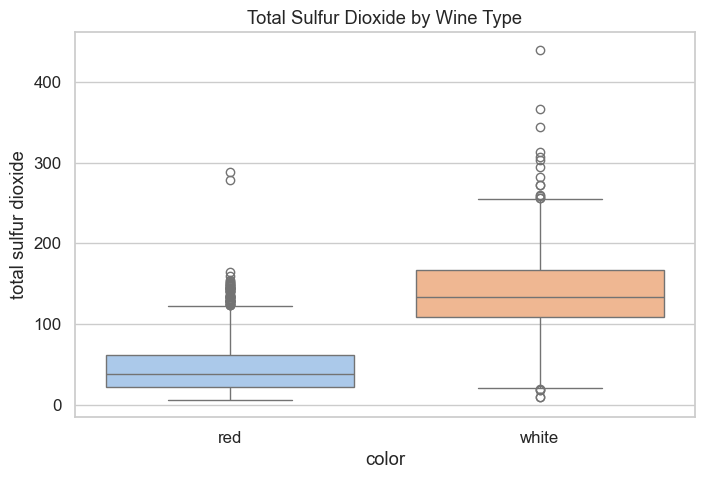

In [18]:
plt.figure(figsize=(8,5))
sns.boxplot(x='color', y='alcohol',hue='color', data=df, palette='pastel', legend=False)
plt.title('Alcohol Content by Wine Type')
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='color', y='total sulfur dioxide',hue='color', data=df, palette='pastel', legend=False)
plt.title('Total Sulfur Dioxide by Wine Type')
plt.show()

### Statistical Test Example: Red vs White Alcohol

In [19]:
red_alcohol = df[df['color']=='red']['alcohol']
white_alcohol = df[df['color']=='white']['alcohol']
t_stat, p_val = stats.ttest_ind(red_alcohol, white_alcohol, equal_var=False)
print(f"\nT-test: Alcohol (Red vs White) | t={t_stat:.3f}, p={p_val:.5f}")


T-test: Alcohol (Red vs White) | t=-2.859, p=0.00428


### Outlier Detection (Z-score method)

In [20]:
z_scores = np.abs(stats.zscore(df[num_features]))
outliers = (z_scores > 3).sum()
outlier_percent = 100 * (z_scores > 3).values.sum() / z_scores.size
print(f"\nEstimated outliers per feature:\n{outliers}")
print(f"Total outlier cells percentage: {outlier_percent:.2f}%")


Estimated outliers per feature:
fixed acidity           128
volatile acidity         95
citric acid              28
residual sugar           26
chlorides               107
free sulfur dioxide      36
total sulfur dioxide      8
density                   3
pH                       33
sulphates                75
alcohol                   2
dtype: int64
Total outlier cells percentage: 0.76%


### PCA for Dimensionality Reduction

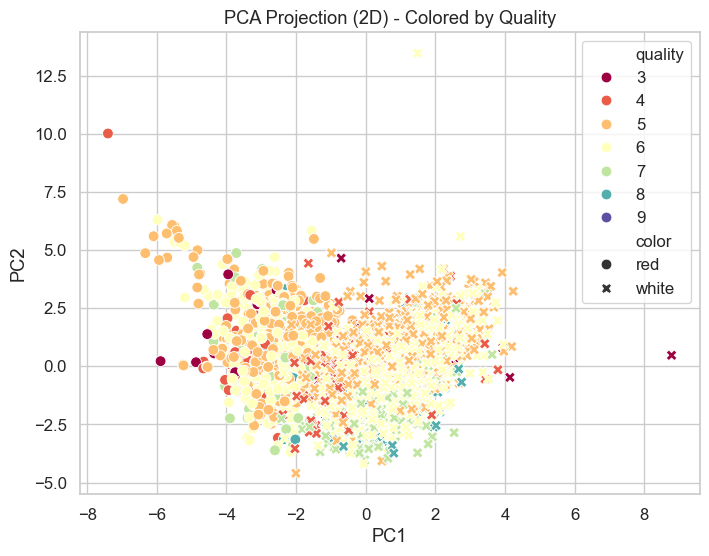


Explained Variance by PC1 & PC2: 50.22%


In [15]:
features = df[num_features]
X_scaled = StandardScaler().fit_transform(features)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
df_pca['quality'] = df['quality']
df_pca['color'] = df['color']

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='quality', style='color', data=df_pca, palette='Spectral', s=60)
plt.title('PCA Projection (2D) - Colored by Quality')
plt.show()

print(f"\nExplained Variance by PC1 & PC2: {pca.explained_variance_ratio_.sum():.2%}")

### Summary of Findings
1. No missing values in the dataset.
2. Quality scores are mostly between 5–7, showing moderate wine quality overall.
3. Alcohol and sulphates are positively correlated with quality.
4. Volatile acidity and density are negatively correlated with quality.
5. White wines generally have higher total sulfur dioxide and residual sugar.
6. Red wines tend to have higher volatile acidity and slightly lower alcohol.
7. PCA reveals a clear partial separation between red and white wines, indicating chemical distinctiveness.
8. Outliers exist mainly in sulfur dioxide and residual sugar — likely natural, not erroneous.

# 2. Data Preparation

In this section, we prepare the Wine Quality dataset for machine learning.  
The goal is to clean, transform, and encode the data so that it can be used to train predictive models effectively.

#### Adding Missing Values

In [ ]:
# Introduce synthetic missingness and outliers 
df_corrupt = df.copy()

# 1) Randomly set 1% of values in 'pH' to NaN
n = int(0.01 * len(df_corrupt))
idx = np.random.choice(df_corrupt.index, n, replace=False)
df_corrupt.loc[idx, 'pH'] = np.nan

# 2) Insert some extreme outliers in 'alcohol' (e.g., multiply 0.2% by 5)
m = max(1, int(0.002 * len(df_corrupt)))
out_idx = np.random.choice(df_corrupt.index, m, replace=False)
df_corrupt.loc[out_idx, 'alcohol'] = df_corrupt.loc[out_idx, 'alcohol'] * 5

# confirm
df_corrupt.isna().sum()

### Detect Outliers